<a href="https://colab.research.google.com/github/blizanac76/Reinforcement-Learning/blob/main/MazeRL_ZadaciDomaciv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from abc import ABC, abstractmethod
from typing import Iterable
from copy import copy

import numpy as np
import matplotlib.pyplot as plt

from random import random
import random

In [3]:
class Cell(ABC):

    @abstractmethod
    def get_reward(self) -> float:
        pass

    def is_steppable(self) -> bool:
        return True

    def is_terminal(self) -> bool:
        return False

    def has_value(self) -> bool:
        return True

In [4]:
class RegularCell(Cell):

    def __init__(self, reward: float):
        self.reward = reward

    def get_reward(self) -> float:
        return self.reward


class TerminalCell(Cell):

    def __init__(self, reward: float):
        self.reward = reward

    def get_reward(self) -> float:
        return self.reward

    def is_terminal(self) -> bool:
        return True

    def has_value(self) -> bool:
        return False


class WallCell(Cell):

    def get_reward(self) -> float:
        return 0

    def is_steppable(self) -> bool:
        return False

    def has_value(self) -> bool:
        return False

class TeleportCell(Cell):

    def __init__(self, reward: float):
        self.reward = reward
    def get_reward(self) -> float:
        return 0
    def is_steppable(self) -> bool:
        return True
    def has_value(self) -> bool:
        return False




In [5]:
class Board:

    @staticmethod
    #process_cells uzima matricu POLJA
    #obrada polja i formiranje liste lista klasa POLJE
    def process_cells(cells: list[list[Cell]]):
        cells = [list(row) for row in cells] if cells else []
        if not cells:
            raise Exception("Number of rows in a board must be at least one.")
        if not cells[0]:
            raise Exception("There has to be at least one column.")
        rows_no = len(cells)
        cols_no = len(cells[0])
        for row in cells:
            if not row or len(row) != cols_no:
                raise Exception(
                    "Each row in a a board must have the same number of columns. ")
        return rows_no, cols_no, cells

  #provera da li je pozicija dobra
    def process_pos(self, pos):
        r, c = pos
        if r < 0 or r >= self.rows_no:
            raise Exception("Invalid row position.")
        if c < 0 or c >= self.cols_no:
            raise Exception("Invalid column position.")
        if not cells[r][c].is_steppable():
            raise Exception("Invalid position: unsteppable cell.")
        return r, c

  #konstruktor uzima polje kao board i poziciju
  #uzima dimenzija table, strukturu polja
  #priprema tablu sa incijalnim poljem
    def __init__(self, cells: Iterable[Iterable[Cell]], pos: tuple[int, int]):
        rows_no, cols_no, cells = Board.process_cells(cells)
        self.cells = cells
        self.rows_no = rows_no
        self.cols_no = cols_no
        r, c = self.process_pos(pos)
        self.row = r
        self.col = c

  #indeksiranje preko koordiata matrice/Liste Lista (table)
    def __getitem__(self, key: tuple[int, int]) -> Cell:
        r, c = key
        return self.cells[r][c]

  #update pozicije, nova pozicija
    def set_position(self, pos):
        r, c = self.process_pos(pos)
        self.row = r
        self.col = c

  #trenutna ozicija
    def current(self):
        return self[self.row, self.col]

  #pomeranje
    def move_up(self):
        if self.row != 0 and \
           self[self.row-1, self.col].is_steppable():
            self.row = self.row-1

    def move_down(self):
        if self.row != self.rows_no-1 and \
           self[self.row+1, self.col].is_steppable():
            self.row = self.row+1

    def move_left(self):
        if self.col != 0 and \
           self[self.row, self.col-1].is_steppable():
            self.col = self.col-1

    def move_right(self):
        if self.col != self.cols_no-1 and \
           self[self.row, self.col+1].is_steppable():
            self.col = self.col+1

  #numeracija pokreta
    def move(self, direction):
        if direction == 0:
            self.move_right()
        elif direction == 1:
            self.move_up()
        elif direction == 2:
            self.move_left()
        elif direction == 3:
            self.move_down()
        else:
            raise Exception("Invalid direction.")

  #pravi listu svih polja koja su dostupna za kretanje
    def get_states(self):
        states = []
        for r in range(self.rows_no):
            for c in range(self.cols_no):
                if self[r, c].is_steppable():
                    states.append((r, c))
        return states

In [6]:
#kod za svako polje preko kojih mapiramo matricu
def int_to_cell(code: int) -> Cell:
    if code == 0:
        return RegularCell(-1)
    elif code == 1:
        return RegularCell(-10)
    elif code == 2:
        return WallCell()
    elif code == 3:
        return TerminalCell(-1)
    elif code == 4:
        return TeleportCell(-1)

In [7]:
#generisanje matrice polja, nasumicno, 8x8, sa verovatnocama za svako polje. prv
#i broj je broj polja, dimenzije i sanse za svako polje da se stvori
cell_codes = np.random.choice(5, size=(8, 8), p=[0.6, 0.1, 0.1, 0.1, 0.1])
print(cell_codes)

[[0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 3]
 [2 0 1 0 0 2 0 3]
 [0 0 0 0 0 4 4 4]
 [0 0 1 0 0 0 0 0]
 [0 0 0 2 0 4 0 1]
 [0 1 1 0 3 2 1 0]]


In [31]:
#vizualizacija matrice od gore
#crtanje RGB formatom
#board img pravi 3d vektore za svaku RGB boju
def draw_board(board: Board, draw_pos=True):
    board_img = np.ones(shape=(board.rows_no, board.cols_no, 3), dtype=np.uint8)
    for i in range(board.rows_no):
        for j in range(board.cols_no):
            if isinstance(board[i, j], RegularCell):
                if board[i, j].get_reward() == -1:
                    board_img[i, j, :] = [255, 255, 255] # Regular cell BELO
                else: #CRVENO
                    board_img[i, j, :] = [255, 0, 0] # Regular cell with penalty
            elif isinstance(board[i, j], WallCell): #CRNO
                board_img[i, j, :] = [0, 0, 0] # Wall cell
            elif isinstance(board[i, j], TeleportCell):#ZELENO
                board_img[i, j, :] = [0, 100, 0] #Teleport Cell
            else:#PLAVO
                board_img[i, j, :] = [0, 0, 255] # Terminal cell
    #board_img[board.row, board.col, :] = [255, 255, 0]
    plt.imshow(board_img, )
    if draw_pos:
        plt.text(board.col-0.1, board.row+0.1, "X", fontweight="bold")

In [9]:
cells = [[int_to_cell(cell_codes[i, j]) for i in range(cell_codes.shape[0])] for j in range(cell_codes.shape[1])]

In [10]:
board = Board(cells, (0, 0))

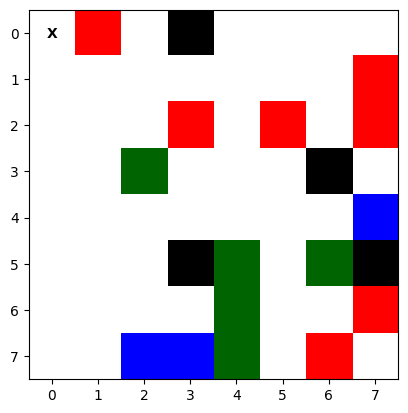

In [11]:
draw_board(board)

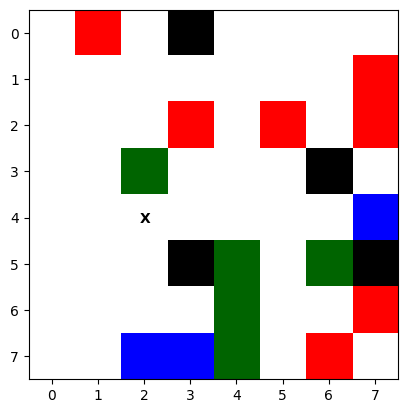

In [43]:
draw_board(board)

In [64]:
board.move(2)

#3 DOLE
#1 gore
#2 levo
#0 desno


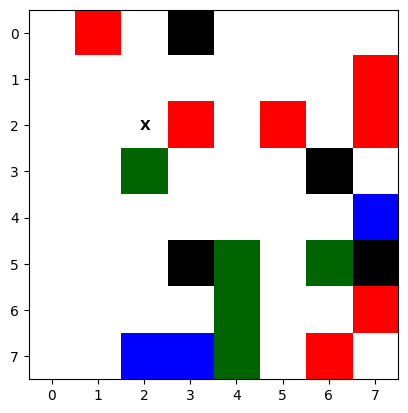

In [66]:
draw_board(board)

#teleportuje na nasumicno polje, unutar table koje je dostupno kao pozicija
#DOMACI 1.1
Xc, Yc = board.row, board.col

if isinstance(board.current(), TeleportCell):
    print("detektujem teleport polje")

    # nova pozicija u opsegu dimenzija table
    new_position = (random.randint(0, board.rows_no - 1), random.randint(0, board.cols_no - 1))

    #random polje mora biti steppable ako nije nadji novo
    while not board[new_position].is_steppable():
        new_position = (random.randint(0, board.rows_no - 1), random.randint(0, board.cols_no - 1))

    print(f"idem na polje::::: {new_position}")
    board.set_position(new_position)

Dodavanje optimalne vrednosti stanja:


In [67]:
class ValueIteration:
    def __init__(self, board, gamma=0.9, epsilon=1e-6):
        self.board = board
        self.gamma = gamma
        self.epsilon = epsilon

    def run_value_iteration(self):
        V = {}  # Dictionary to store state values
        for state in self.board.get_states():
            V[state] = 0  # Initialize all state values to zero

        while True:
            delta = 0
            for state in self.board.get_states():
                v = V[state]
                max_value = float('-inf')
                for action in range(4):  # Assuming 4 possible actions (up, down, left, right)
                    self.board.set_position(state)
                    self.board.move(action)
                    next_state = self.board.row, self.board.col
                    reward = self.board[next_state].get_reward()
                    value = reward + self.gamma * V[next_state]
                    max_value = max(max_value, value)

                V[state] = max_value
                delta = max(delta, abs(v - V[state]))

            if delta < self.epsilon:
                break

        return V



In [72]:
def draw_board_with_values(board: Board, state_values):
    for i in range(board.rows_no):
        for j in range(board.cols_no):
            cell_value = state_values.get((i, j), 0)  # Get the V-value for the cell
            plt.text(j, i, f'{cell_value:.2f}', ha='center', va='center', fontsize=10)

    plt.xlim(-0.5, board.cols_no - 0.5)
    plt.ylim(board.rows_no - 0.5, -0.5)
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()



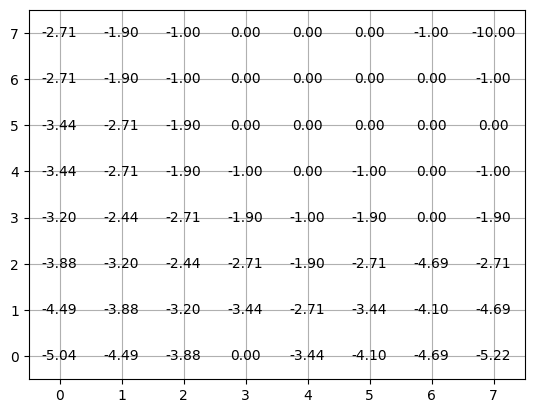

In [73]:
value_iteration = ValueIteration(board)

# Run the value iteration algorithm to get V-values
state_values = value_iteration.run_value_iteration()

# Call draw_board_with_values to visualize the V-values on the board
draw_board_with_values(board, state_values)

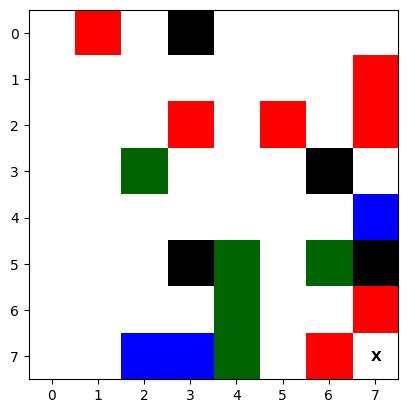

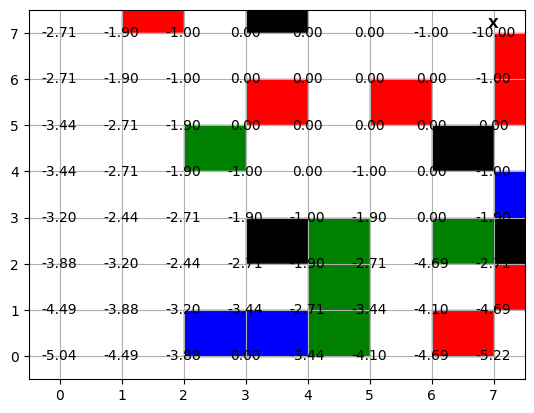